In [1]:
import pandas as pd
import json
from collections import Counter
from googletrans import Translator
from emoji import demojize
import re
import time
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('/Users/motlaq/Data Analysis/instagramCoffeeshops/CoffeeshopARposts.csv')
df

,Account,Arabic Posts (%),Arabic Comments (%)
0,koma.kw,12.00,75.86
1,wing_cafe,75.53,87.50
2,7gm_coffee,84.61,83.22
3,arabica.kuwait,16.84,73.29
4,askcoffeekw,85.93,75.18
5,cafcafe,52.47,83.78
6,caffeinekuwait,69.27,72.75
7,codecafe,68.75,77.94
8,koffie.kwt,61.04,74.51
9,methodscoffee,90.63,92.21


In [7]:
df['Arabic Posts (%)'].mean()

57.411874999999995

In [8]:
df['Arabic Comments (%)'].mean()

73.76875

In [9]:
df.describe()

,Arabic Posts (%),Arabic Comments (%)
count,16.000000,16.000000
mean,57.411875,73.768750
std,30.987820,18.160837
min,10.770000,15.270000
25%,34.562500,73.155000
50%,64.895000,76.900000
75%,84.940000,83.360000
max,98.810000,92.210000


In [10]:
df['Arabic in Comments > Arabic in posts'] = df['Arabic Comments (%)'] > df['Arabic Posts (%)']
df

,Account,Arabic Posts (%),Arabic Comments (%),Arabic in Comments > Arabic in posts
0,koma.kw,12.00,75.86,True
1,wing_cafe,75.53,87.50,True
2,7gm_coffee,84.61,83.22,False
3,arabica.kuwait,16.84,73.29,True
4,askcoffeekw,85.93,75.18,False
5,cafcafe,52.47,83.78,True
6,caffeinekuwait,69.27,72.75,True
7,codecafe,68.75,77.94,True
8,koffie.kwt,61.04,74.51,True
9,methodscoffee,90.63,92.21,True


In [11]:
(len(df[df['Arabic in Comments > Arabic in posts'] == True])/len(df))*100

75.0

# 75% of coffeeshops have more Arabic comments than Arabic posts. 

In [12]:
print((len(df[df['Arabic Comments (%)'] > 70])/len(df))*100)
print((len(df[df['Arabic Posts (%)'] > 70])/len(df))*100)

81.25
37.5


# 81% of coffeeshops have more than 70% arabic comments. 
# While 37% of them have more than 70% arabic posts.

---
---

(below is the code used in the last part of the article.)

In [11]:
caffiene = pd.read_csv('caffienekw.csv')
caffiene

,usernames,post_captions,like_counts,comments_counts,comments_content,comment_user,types,id,post_lang,comment_lang,lang_comb
0,caffeinekuwait,Eid Mubarak,-1,1,لو سمحت ودي اطلب بوكس القهوه الي عند الأخ مساع...,om_7amoode,GraphImage,2315306143347681153,ar,ar,arar
1,caffeinekuwait,عيدكم مبارك • Eid Mubarak,-1,5,تقبل الله طاعتكم وعساكم من عواده,obaidan1974,GraphImage,2315306079141408584,ar,ar,arar
2,caffeinekuwait,عيدكم مبارك • Eid Mubarak,-1,5,@obaidan1974 منّا ومنك انشالله,caffeinekuwait,GraphImage,2315306079141408584,ar,ar,arar
3,caffeinekuwait,عيدكم مبارك • Eid Mubarak,-1,5,How do i pick up from your shuwaikh branch???,abalhajrey,GraphImage,2315306079141408584,ar,en,aren
4,caffeinekuwait,عيدكم مبارك • Eid Mubarak,-1,5,@abalhajrey you just come on by. We’re here :),caffeinekuwait,GraphImage,2315306079141408584,ar,en,aren
5,caffeinekuwait,الله يعوده علينا وعليكم بخير وصحة,-1,5,للاسف انقصه ذربه حيييل و بخاطري ما لحقت عليها ...,llulu78_,GraphImage,2310937150159741461,ar,ar,arar
6,caffeinekuwait,الله يعوده علينا وعليكم بخير وصحة,-1,5,@llulu78_ اي نوفرها انشالله. ليلحين موجود عالم...,caffeinekuwait,GraphImage,2310937150159741461,ar,ar,arar
7,caffeinekuwait,الله يعوده علينا وعليكم بخير وصحة,-1,5,سلام عليكم اخوي الله يخليك وين احصل كولد برو ا...,mohdxb97,GraphImage,2310937150159741461,ar,ar,arar
8,caffeinekuwait,الله يعوده علينا وعليكم بخير وصحة,-1,5,@mohdxb97 وعليكم السلام متوفر بوكس الكولد برو ...,caffeinekuwait,GraphImage,2310937150159741461,ar,ar,arar
9,caffeinekuwait,الله يعوده علينا وعليكم بخير وصحة,-1,5,@alfoodry71,a_alshehaa,GraphImage,2310937150159741461,ar,Emjoi or No Caption,arEmjoi or No Caption


In [12]:
lang_counter = Counter(caffiene['lang_comb'])
print(lang_counter)
print(sum(lang_counter.values()))

Counter({'arar': 226, 'enar': 73, 'arEmjoi or No Caption': 71, 'aren': 66, 'enen': 46, 'enEmjoi or No Caption': 42})
524


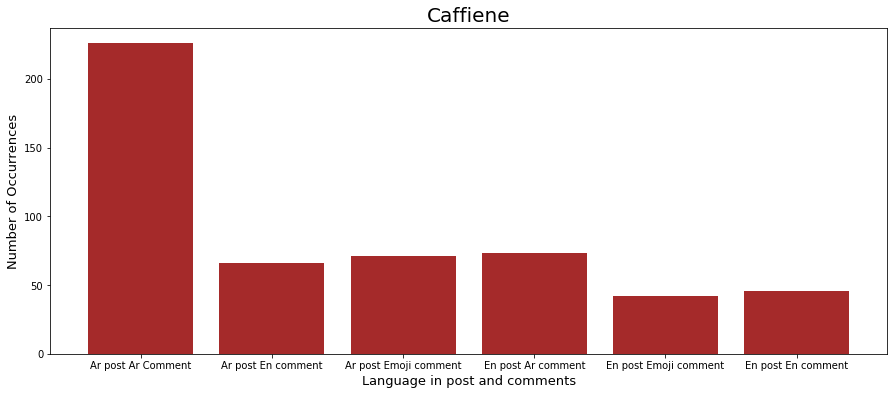

In [13]:
plt.figure(figsize=(15,6))
plt.title('Caffiene', fontsize=20)
plt.xlabel('Language in post and comments', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
labels = ['Ar post Ar Comment',
          'Ar post En comment',
          'Ar post Emoji comment',
          'En post Ar comment',
          'En post Emoji comment',
          'En post En comment']
plt.bar(lang_counter.keys(), lang_counter.values(), tick_label=labels, color='brown')
plt.savefig('caffiene', dpi=300)
#plt.xticks(rotation=20)

In [60]:
caffiene_arposts = caffiene[caffiene['post_lang'] == 'ar']
caffiene_arposts['comments_counts'].mean()

20.8099173553719

In [15]:
caffiene_enposts = caffiene[caffiene['post_lang'] == 'en']
caffiene_enposts['comments_counts'].mean()

9.720496894409937

## Arabic Posts:
   * #### Arabic Comments: 62% 
   * #### Emoji: 19.5%
   * #### English Comments: 18%
  
## English Posts: 
   * #### Arabic Comments: 45.3%
   * #### English Comments: 28.5%
   * #### Emoji: 26.1% 

## Also, Arabic posts get an average of 20.8 comments , while English posts get an average of 9 comments. 

# So from a know-your-customer perspective, You'd much better use Arabic! 


In [58]:
test_caff = caffiene[['id', 'post_lang', 'comments_counts', 'comment_lang']]

In [59]:
testcaff_justposts = test_caff.drop_duplicates(subset='id')
testcaff_justposts.groupby('post_lang')['comments_counts'].mean().reset_index()

,post_lang,comments_counts
0,ar,9.945946
1,en,6.185185


---

Counter({'enEmjoi or No Caption': 136, 'enar': 85, 'enen': 26, 'arEmjoi or No Caption': 5, 'arar': 3, 'aren': 2})
257


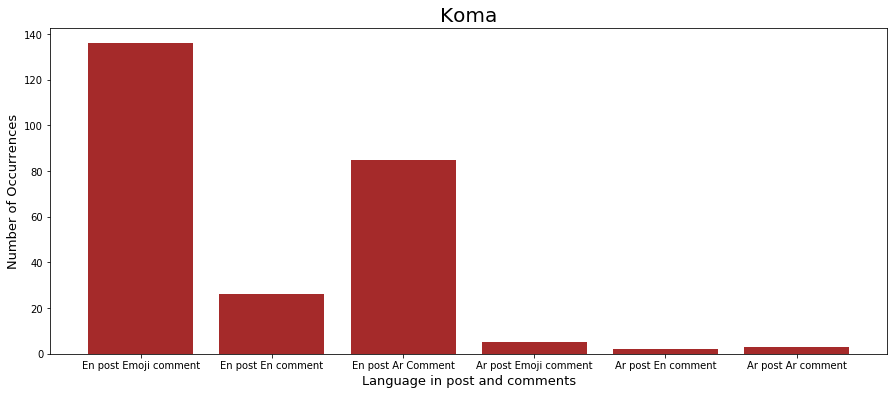

In [16]:
koma = pd.read_csv('komakw.csv')
koma
lang_counter_koma = Counter(koma['lang_comb'])
print(lang_counter_koma)
print(sum(lang_counter_koma.values()))


plt.figure(figsize=(15,6))
plt.title('Koma', fontsize=20)
plt.xlabel('Language in post and comments', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
labels = ['En post Emoji comment',
          'En post En comment',
          'En post Ar Comment',
          'Ar post Emoji comment',
          'Ar post En comment',
          'Ar post Ar comment']
plt.bar(lang_counter_koma.keys(), lang_counter_koma.values(), tick_label=labels, color='brown')
plt.savefig('koma', dpi=300)
#plt.xticks(rotation=20)


#### If you just look at English posts (which is dominating here), you see that most of them get emoji comments (55%), and when it comes to non-emoji comments, the number of Arabic comments is triple that of English comments (34.4% to 10.5%.)

#### So even in an account where english is dominating, comments are still mostly in Arabic (well, if it's not Emoji.)



In [17]:
arkoma = koma[koma['post_lang'] == 'ar']
print(arkoma['comments_counts'].mean())

3.2


In [18]:
enkoma = koma[koma['post_lang'] == 'en']
print(enkoma['comments_counts'].mean())

10.036437246963562


In [19]:
koma['comments_counts'].mean()

9.770428015564203

---

Counter({'arar': 194, 'enar': 131, 'enEmjoi or No Caption': 100, 'enen': 65, 'aren': 60, 'arEmjoi or No Caption': 52})
602


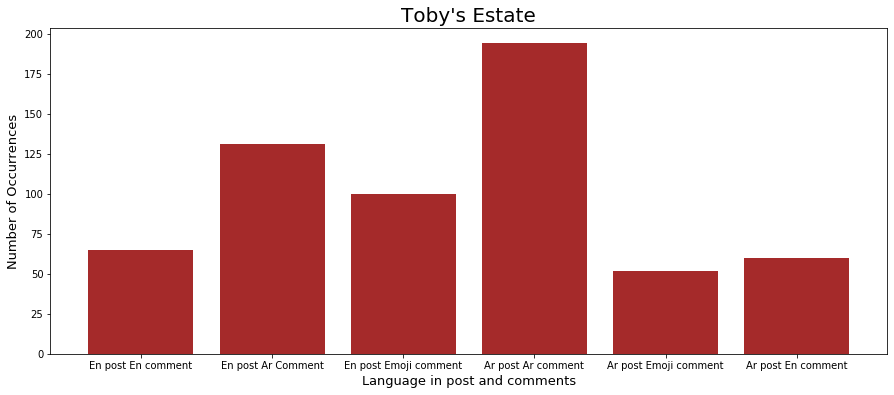

In [73]:
tobys = pd.read_csv('tobys.csv')
lang_counter_tobys = Counter(tobys['lang_comb'])
#print(lang_counter_vol1)
print(lang_counter_tobys)
print(sum(lang_counter_tobys.values()))


plt.figure(figsize=(15,6))
plt.title("Toby's Estate", fontsize=20)
plt.xlabel('Language in post and comments', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
labels = ['En post En comment',
          'En post Ar Comment',
          'En post Emoji comment',
          'Ar post Ar comment',
          'Ar post Emoji comment',
          'Ar post En comment']
plt.bar(lang_counter_tobys.keys(), lang_counter_tobys.values(), color='brown', tick_label=labels)
plt.savefig('tobys', dpi=300)
#plt.xticks(rotation=20)


In [29]:
Counter(tobys['post_lang'])

Counter({'en': 296, 'ar': 306})

In [49]:
test_tobys = tobys[['id', 'post_lang', 'comments_counts', 'comment_lang']]

In [56]:
test_justposts = test_tobys.drop_duplicates(subset='id')
test_justposts.groupby('post_lang')['comments_counts'].mean().reset_index()

,post_lang,comments_counts
0,ar,7.023256
1,en,4.766667
